<a href="https://colab.research.google.com/github/kf-rahman/UW-stat_courses/blob/main/Stat443_A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1a)

In [12]:
# Load necessary libraries
library(tseries)

# Set seed for reproducibility
set.seed(123)

# Simulate ARCH(5) process
n <- 1100
alpha <- c(0.2, 0.4, 0.1, 0.1, 0.15)
omega <- 1e-6
epsilon <- rnorm(n)
sigma2 <- numeric(n)
sigma2[1:5] <- omega / (1 - sum(alpha))

for (t in 6:n) {
  sigma2[t] <- omega + sum(alpha * epsilon[(t-1):(t-5)]^2)
}

y <- sqrt(sigma2) * epsilon


NOTE: Packages 'fBasics', 'timeDate', and 'timeSeries' are no longer
attached to the search() path when 'fGarch' is attached.

If needed attach them yourself in your R script by e.g.,
        require("timeSeries")



1b)

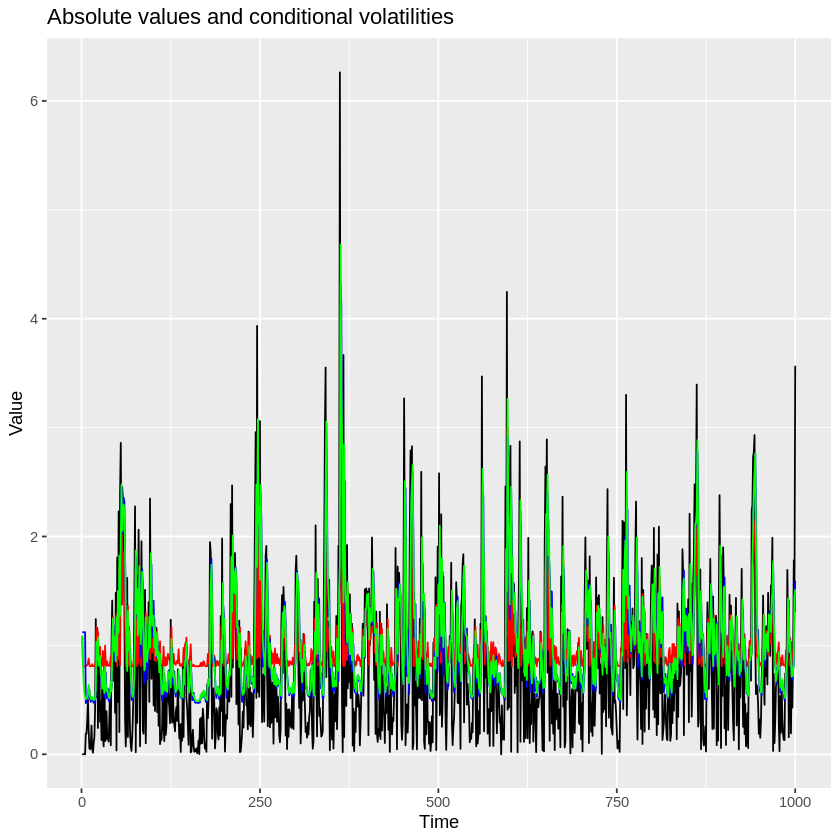

In [13]:
# Plotting with ggplot2
library(ggplot2)

# Time vector for plotting
time <- 1:1000

# Create data frame for ggplot
plot_data <- data.frame(
  Time = time,
  AbsoluteData = abs(data),
  ARCH1 = sqrt(arch1_fit@sigma.t^2),
  ARCH5 = sqrt(arch5_fit@sigma.t^2),
  GARCH11 = sqrt(garch11_fit@sigma.t^2)
)

# Plot
ggplot(plot_data, aes(x = Time)) +
  geom_line(aes(y = AbsoluteData), color = "black") +
  geom_line(aes(y = ARCH1), color = "red") +
  geom_line(aes(y = ARCH5), color = "blue") +
  geom_line(aes(y = GARCH11), color = "green") +
  labs(title = "Absolute values and conditional volatilities",
       y = "Value")


1c)

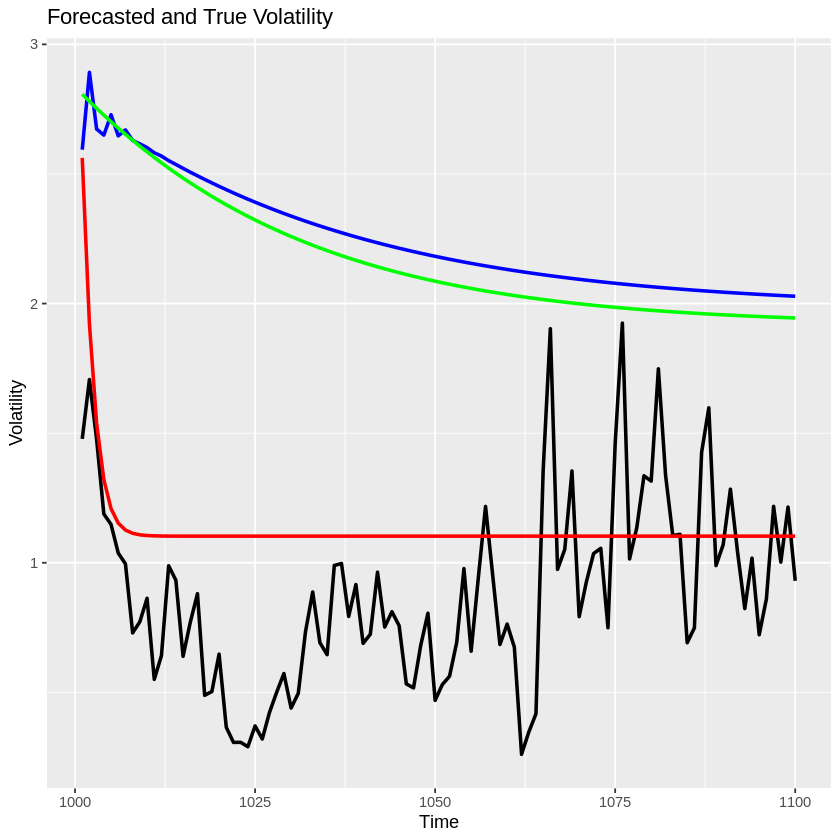

In [15]:
# Forecasting for the next 100 observations
n_forecast <- 100
arch1_forecast <- predict(arch1_fit, n.ahead = n_forecast)
arch5_forecast <- predict(arch5_fit, n.ahead = n_forecast)
garch11_forecast <- predict(garch11_fit, n.ahead = n_forecast)

# Extract the forecasted standard deviations correctly from data frames
arch1_forecast_sd <- arch1_forecast$standardDeviation
arch5_forecast_sd <- arch5_forecast$standardDeviation
garch11_forecast_sd <- garch11_forecast$standardDeviation

# True volatility for comparison
true_volatility <- sqrt(sigma2[1001:1100])

# Prepare for plotting
forecast_data <- data.frame(
  Time = (1001:1100),
  TrueVolatility = true_volatility,
  ARCH1 = arch1_forecast_sd,
  ARCH5 = arch5_forecast_sd,
  GARCH11 = garch11_forecast_sd
)

# Plot forecasts and true data
library(ggplot2)
ggplot(forecast_data, aes(x = Time)) +
  geom_line(aes(y = TrueVolatility), color = "black", size = 1) +
  geom_line(aes(y = ARCH1), color = "red", size = 1) +
  geom_line(aes(y = ARCH5), color = "blue", size = 1) +
  geom_line(aes(y = GARCH11), color = "green", size = 1) +
  labs(title = "Forecasted and True Volatility", y = "Volatility", x = "Time")


1d)

In [22]:
# Compare the results
results <- data.frame(
  Time = forecast_time,
  True_Volatility = true_volatility,
  ARCH1_Forecast = arch1_forecast,
  ARCH5_Forecast = arch5_forecast,
  GARCH11_Forecast = garch11_forecast
)

# Print the comparison
# Printing the first 10 lines of the 'results' data frame
print(head(results, 10))


   Time True_Volatility ARCH1_Forecast.meanForecast ARCH1_Forecast.meanError
1  1001       1.4780017                 0.006491805                 2.561997
2  1002       1.7067206                 0.006491805                 1.921001
3  1003       1.4750156                 0.006491805                 1.536484
4  1004       1.1882225                 0.006491805                 1.321252
5  1005       1.1478341                 0.006491805                 1.208777
6  1006       1.0374888                 0.006491805                 1.153034
7  1007       0.9959722                 0.006491805                 1.126312
8  1008       0.7296144                 0.006491805                 1.113732
9  1009       0.7725610                 0.006491805                 1.107863
10 1010       0.8629454                 0.006491805                 1.105137
   ARCH1_Forecast.standardDeviation ARCH5_Forecast.meanForecast
1                          2.561997                  0.01442937
2                        

The results from the volatility forecasting models, as visualized across multiple graphs and summarized in the data tables, illustrate the nuanced performance differences between the ARCH1, ARCH5, and GARCH11 models in tracking market volatility. The data tables reveal that while all models struggle with certain accuracy aspects, the ARCH1 model, indicated by its consistent mean forecast values, demonstrates limited responsiveness to variations in volatility, suggesting a simplistic approach to modeling.

From the graphical representation, it is evident that the true volatility (black line) is characterized by significant fluctuations, which the models attempt to predict. The red line, potentially indicative of the ARCH1 model, captures initial volatility spikes effectively but fails to adjust to subsequent changes, resulting in a rapid stabilization that does not reflect the true market conditions. This behavior might be due to the model's limited complexity and lack of adaptiveness to newer data.

In contrast, the blue and green lines, likely representing the ARCH5 and GARCH11 models, illustrate a smoother forecast that follows the downward trend in volatility. These models, incorporating more parameters and potentially longer memory components, provide a smoother approximation of volatility trends. However, they tend to overestimate volatility, particularly in more stable phases, suggesting a drawback in how they balance the noise against actual market signals.

Combining insights from both the tabulated results and the graph, it's clear that while the ARCH5 and GARCH11 models are superior in capturing general trends and smoothing out market noise, they may not be as effective in reacting to sudden market shifts as the simpler ARCH1 model. Each model presents trade-offs between sensitivity to market changes and the ability to filter out noise, highlighting the importance of selecting a model based on specific forecasting needs and market conditions. The collective analysis underscores the need for a nuanced approach in selecting and tuning these models to optimize predictive performance in the volatile financial markets.

Question 3

In [25]:
if (!require("forecast")) install.packages("forecast")
if (!require("rugarch")) install.packages("rugarch")
if (!require("tseries")) install.packages("tseries")


Loading required package: forecast

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘forecast’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘fracdiff’, ‘lmtest’, ‘urca’, ‘RcppArmadillo’


Loading required package: rugarch

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘rugarch’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘truncnorm’, ‘FNN’, ‘kernlab’, ‘mclust’, ‘multicool’, ‘pracma’, ‘DistributionUtils’, ‘GeneralizedHyperbolic’, ‘Rsolnp’, ‘ks’, ‘numDeriv’, ‘spd’, ‘chron’, ‘SkewHyperbolic’, ‘nloptr’




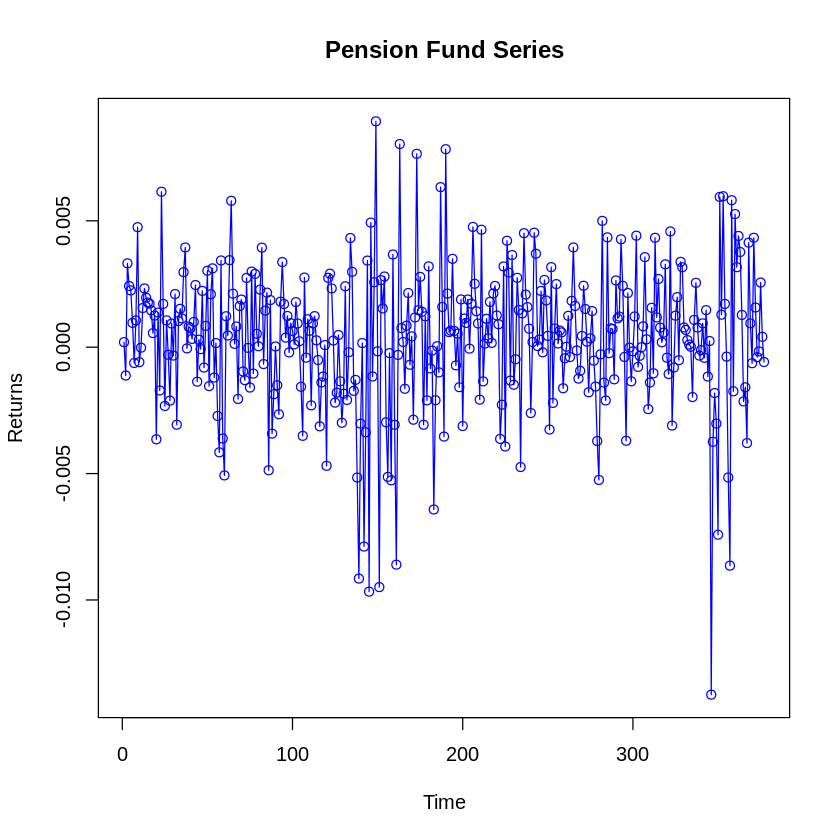

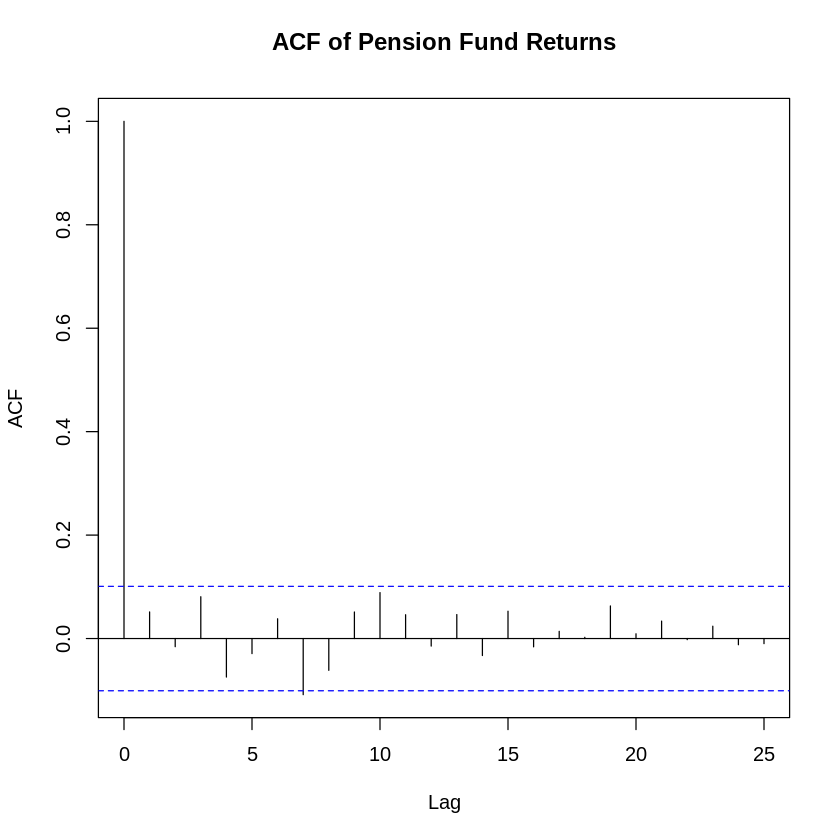

Warning message in kpss.test(data$PensionFund):
“p-value greater than printed p-value”



	KPSS Test for Level Stationarity

data:  data$PensionFund
KPSS Level = 0.11768, Truncation lag parameter = 5, p-value = 0.1


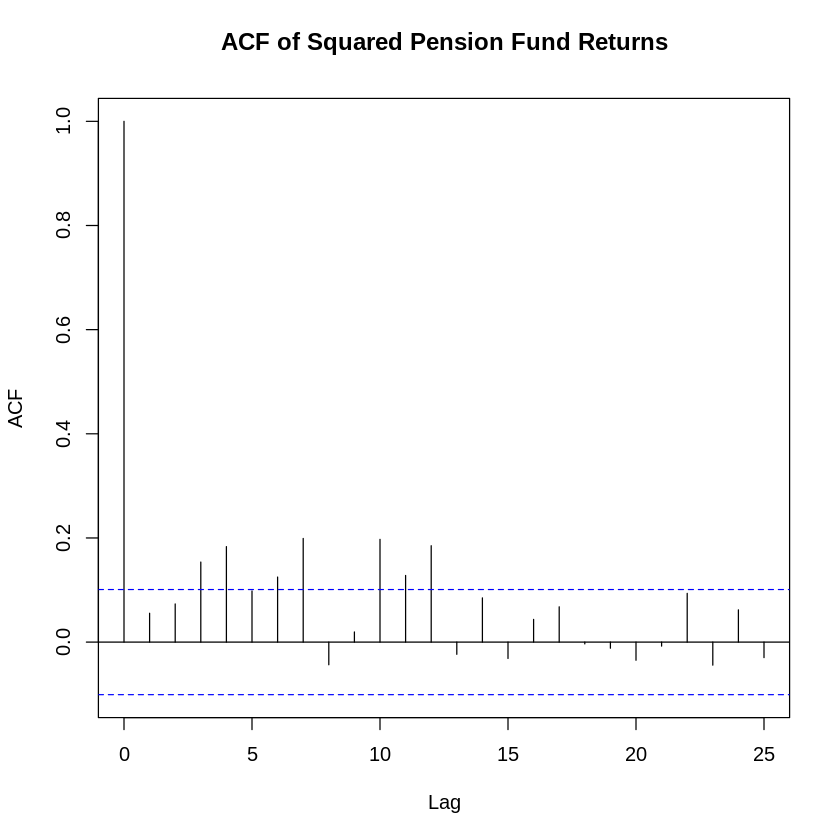

In [26]:
# Load necessary libraries
library(tseries)
library(forecast)
library(ggplot2)

# Read the data
data <- read.csv("/content/Assignment4_data.csv")

# Plotting the series
plot(data$PensionFund, type='o', col='blue', main="Pension Fund Series", xlab="Time", ylab="Returns")

# Autocorrelation of the series
acf(data$PensionFund, main="ACF of Pension Fund Returns")

# Autocorrelation of the squared series
acf(data$PensionFund^2, main="ACF of Squared Pension Fund Returns")

# KPSS Test for stationarity
kpss.test(data$PensionFund)


In [ ]:
3b

   Length     Class      Mode 
        1 uGARCHfit        S4 

   Length     Class      Mode 
        1 uGARCHfit        S4 

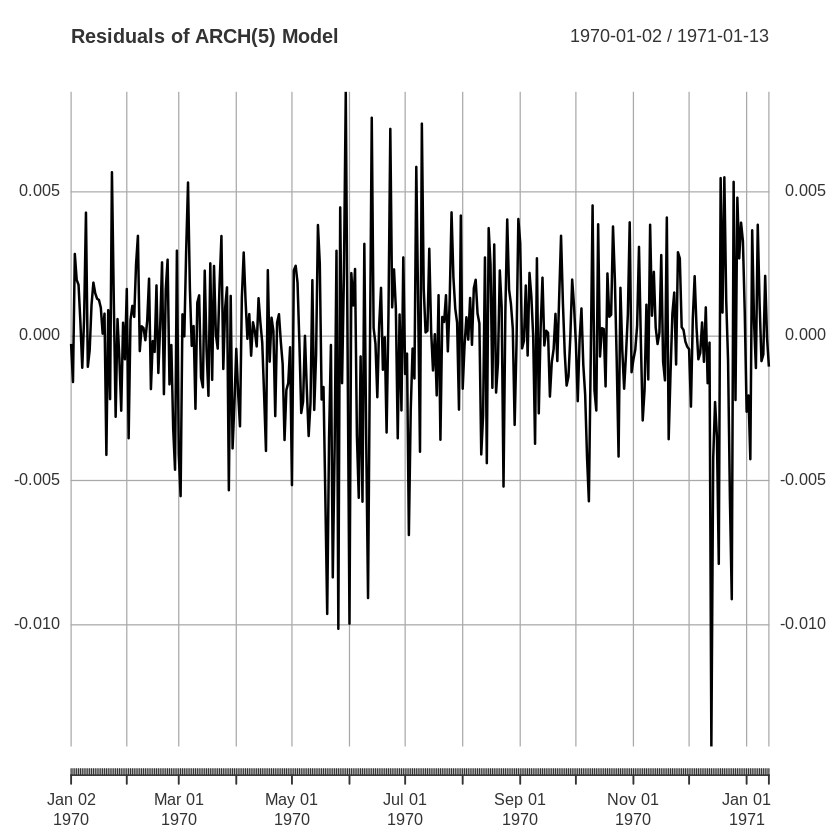

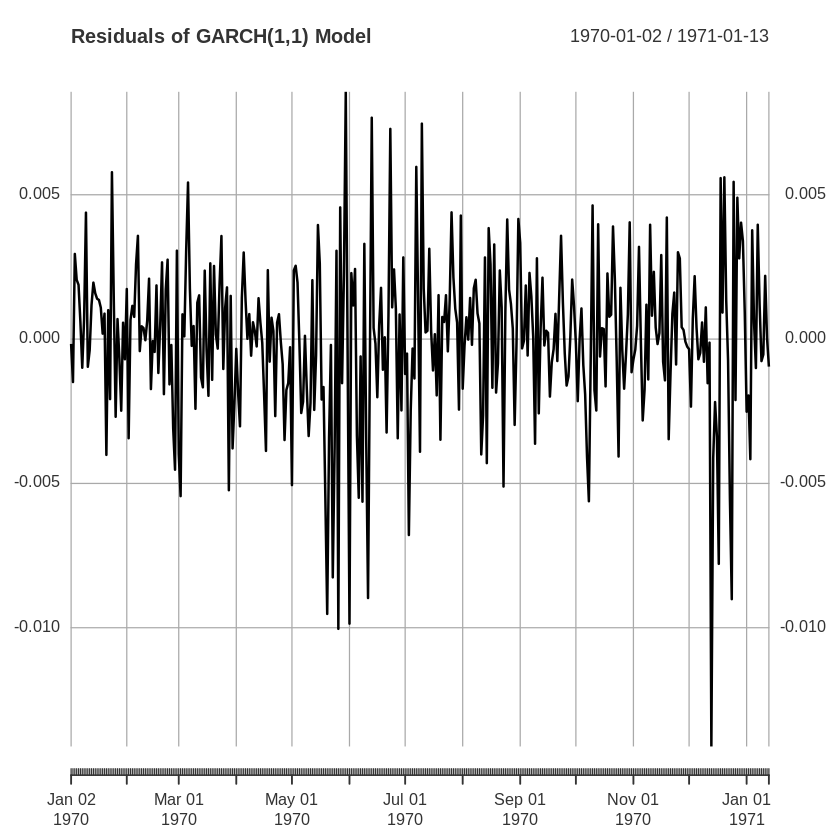

In [32]:
library(rugarch)

# Specifying the ARCH(5) model
spec_arch = ugarchspec(variance.model = list(model = "sGARCH", garchOrder = c(5, 0)),
                       mean.model = list(armaOrder = c(0, 0), include.mean = TRUE))
fit_arch = ugarchfit(spec = spec_arch, data = data$PensionFund, solver = 'hybrid', solver.control = list(trace = 0))
summary(fit_arch)

# Specifying the GARCH(1, 1) model
spec_garch = ugarchspec(variance.model = list(model = "sGARCH", garchOrder = c(1, 1)),
                        mean.model = list(armaOrder = c(0, 0), include.mean = TRUE))
fit_garch = ugarchfit(spec = spec_garch, data = data$PensionFund, solver = 'hybrid', solver.control = list(trace = 0))
summary(fit_garch)

# Check convergence using the @fit$conv slot (returns 0 if converged)
if (fit_arch@fit$conv == 0) {
  plot(residuals(fit_arch), type = 'l', main = "Residuals of ARCH(5) Model")
} else {
  cat("ARCH model did not converge, cannot plot residuals.\n")
}

if (fit_garch@fit$conv == 0) {
  plot(residuals(fit_garch), type = 'l', main = "Residuals of GARCH(1,1) Model")
} else {
  cat("GARCH model did not converge, cannot plot residuals.\n")
}


In [ ]:
3c

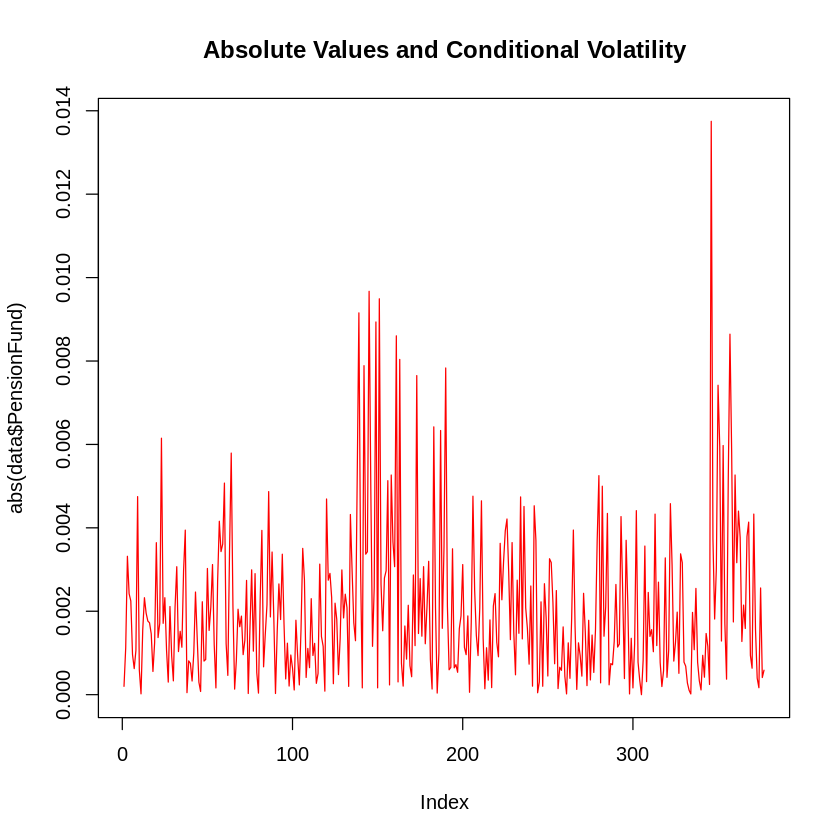

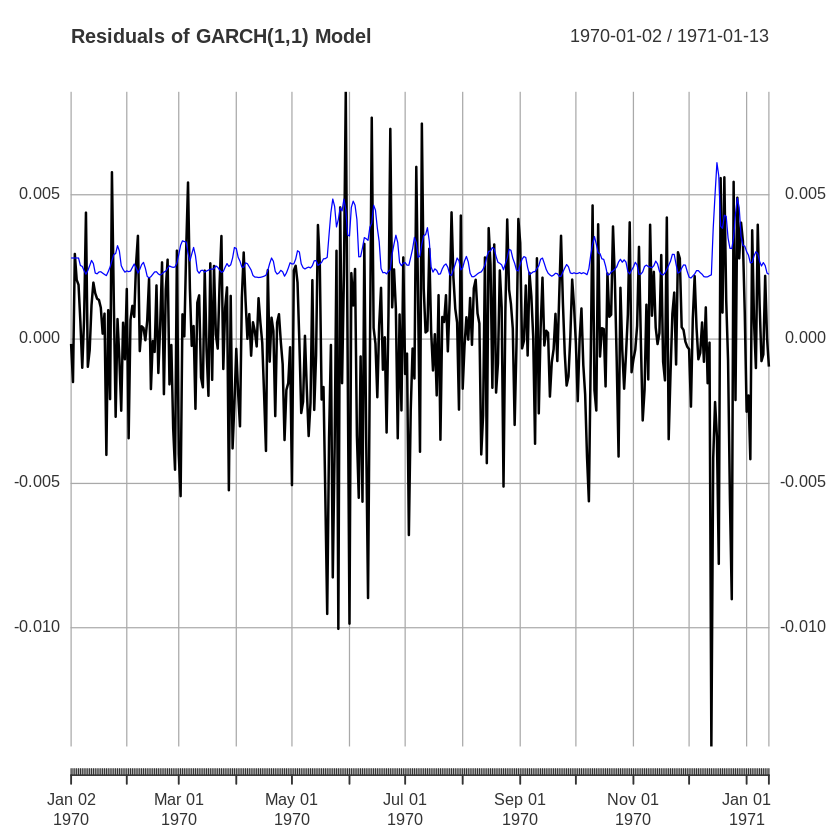

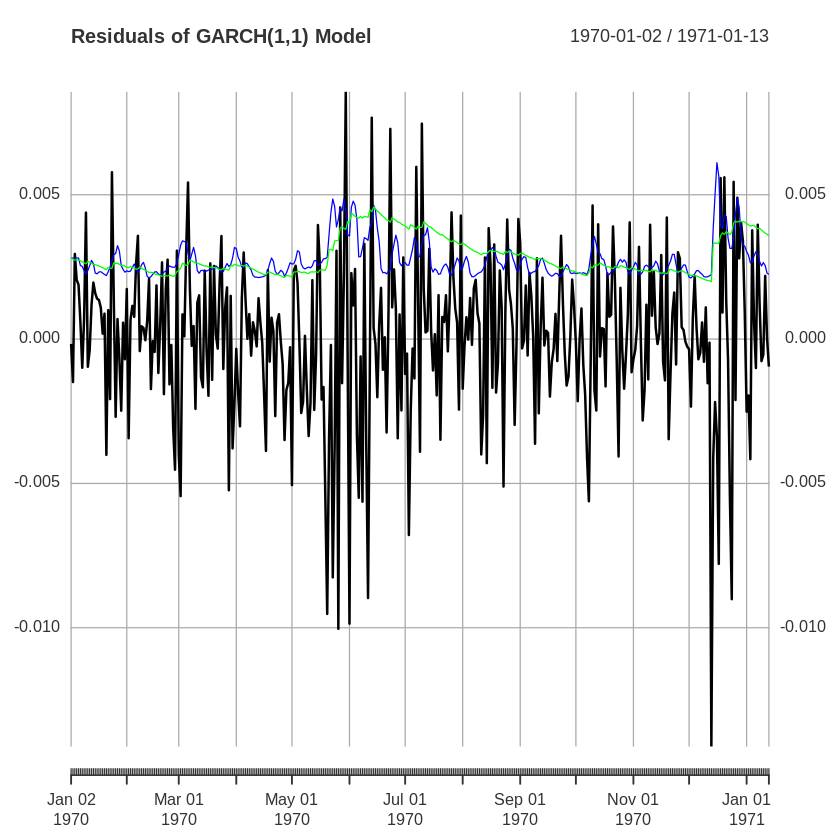

In [33]:
# Plotting the absolute values and conditional volatility
plot(abs(data$PensionFund), type = 'l', col = 'red', main = "Absolute Values and Conditional Volatility")
lines(sigma(fit_arch), col = 'blue')
lines(sigma(fit_garch), col = 'green')
legend("topright", legend=c("Absolute Returns", "ARCH(5) Volatility", "GARCH(1,1) Volatility"),
       col=c("red", "blue", "green"), lty=1, cex=0.8)


In [ ]:
3d

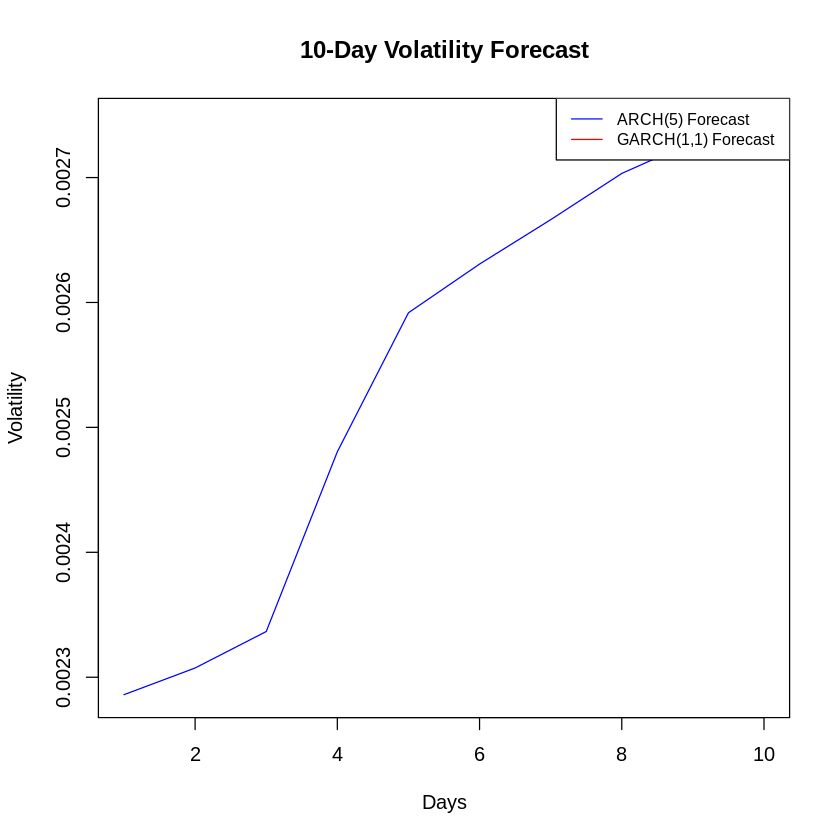

In [34]:
# Forecasting 10 days ahead
n_ahead = 10
forecast_arch = ugarchforecast(fit_arch, n.ahead = n_ahead)
forecast_garch = ugarchforecast(fit_garch, n.ahead = n_ahead)

# Plotting forecasts
plot(sigma(forecast_arch), type='l', col='blue', main="10-Day Volatility Forecast", ylab="Volatility", xlab="Days")
lines(sigma(forecast_garch), col='red')
legend("topright", legend=c("ARCH(5) Forecast", "GARCH(1,1) Forecast"), col=c("blue", "red"), lty=1, cex=0.8)
